In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Image Processing with Neural Network
## Lecture 04 - One Hidden Layer

- Moons Dataset
- Decision Boundary
- Loss curve
- Sigmoid, Tanh

<img src='../../../prasami_images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com" align = "left"/>

## Import Statements

In [5]:
###-----------------
### Import Libraries
###-----------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf

## Setup Global Parameters

In [7]:
###----------------
### Some parameters
###----------------

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 110  # number of epochs
ALPHA = 0.001  # learning rate
N_SAMPLES = 1000
BATCH_SIZE= 32
TEST_SIZE = 0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [8]:
def fn_plot_decision_boundary(model, X, y):

    # initialize the figure
    fig, ax = plt.subplots(figsize = (8,5))

    # Small increment to create object function surface
    dm = 0.01

    # Range of X values (First feature)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5

    # Range of Y values (Second feature)
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # Create a grid to evaluate the object function
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))

    # flatten and stack
    # arrays will be stacked along their last axis after being upgraded to at least 2-D
    # with 1’s post-pended to the shape (column vectors made out of 1-D arrays)
    XX = np.c_[xx.ravel(), yy.ravel()] 
    y_p = model.predict(XX)
    

    # list to collect predictions
    Z = y_p.argmax(axis = 1)

    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.Paired)
    ax.scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k', cmap=plt.cm.bwr)
    ax.set_title('Decision Boundary')

    ax.set_xlabel('A')
    ax.set_ylabel('B')
    plt.show()

## Generate Data Set
<div style="font-family: Arial; font-size:1.2em">
Sklearn's dataset generator is good source of data for learning. To keep the example simple, I'll suggest  <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html">make_moon</a> dataset generator.
</div>

In [10]:
X, y = datasets.make_moons(n_samples=N_SAMPLES,
                           noise=NOISE,
                           shuffle=True,
                           random_state=RANDOM_STATE)
# X, y = datasets.make_circles(n_samples=N_SAMPLES,
#                            noise=NOISE,
#                            shuffle=True,
#                            random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0], dtype=int64))

In [11]:
data_df = pd.DataFrame(X, columns=['A', 'B'])
data_df['target'] = y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [13]:
data_df.describe()

,A,B,target
count,1000.000000,1000.000000,1000.00000
mean,0.490841,0.239025,0.50000
std,0.898951,0.540082,0.50025
min,-1.688795,-0.955280,0.00000
25%,-0.149565,-0.205090,0.00000
50%,0.500100,0.241163,0.50000
75%,1.095048,0.680394,1.00000
max,2.419113,1.612075,1.00000


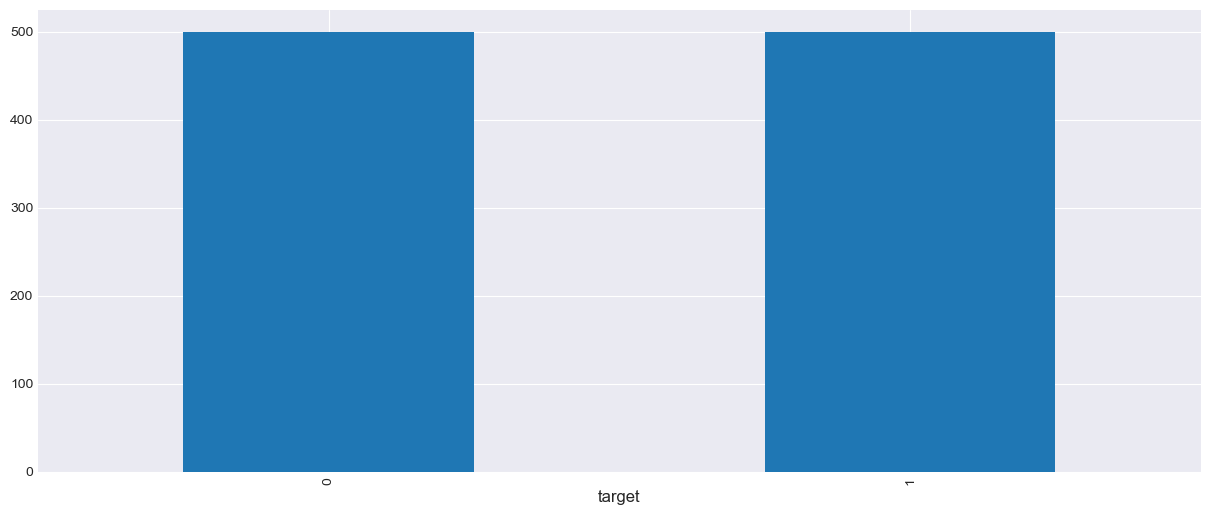

In [14]:
data_df['target'].value_counts().plot(kind = 'bar');

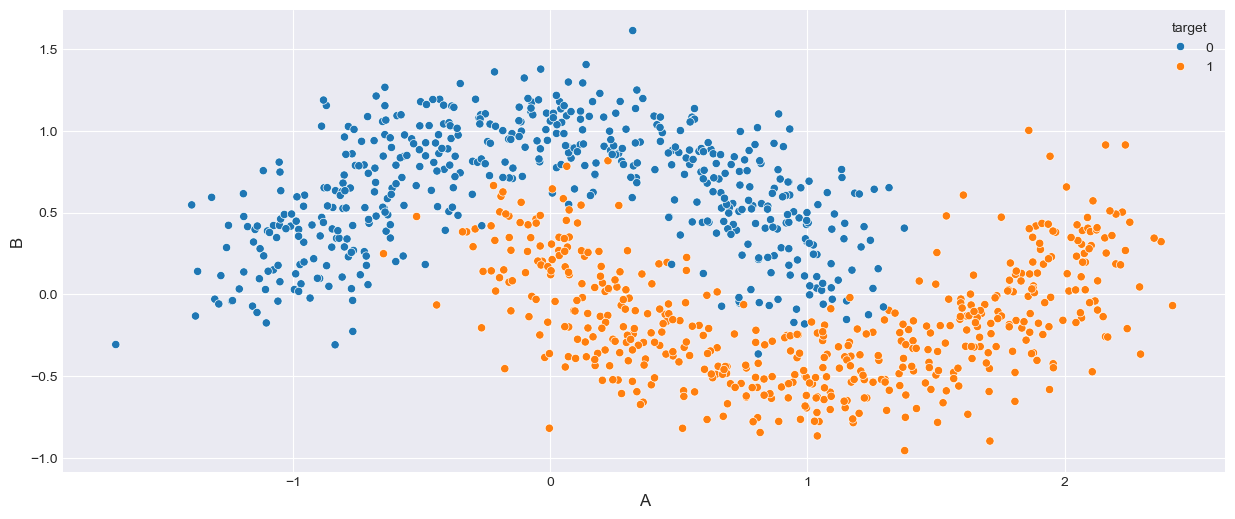

In [15]:
ax = sns.scatterplot(data=data_df, x='A', y='B', hue='target')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=TEST_SIZE,
                                                    stratify=y,
                                                    random_state=RANDOM_STATE)


In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [18]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(2,), name = 'input'),
    tf.keras.layers.Dense(5, activation = 'relu', name = 'layer1'),
    tf.keras.layers.Dense(5, activation = 'relu', name = 'layer2'),
    tf.keras.layers.Dense(4, activation = 'relu', name = 'layer3'),
    tf.keras.layers.Dense(3, activation = 'relu', name = 'layer4'),
    tf.keras.layers.Dense(2, name = 'output'),
 
    
    
], name = 'first_model')

In [19]:
X_train[:1].shape

(1, 2)

In [20]:
prediction = model(X_train[:1]).numpy()
prediction.sum()

-1.2328258

In [21]:
tf.nn.softmax(prediction).numpy()

array([[0.5627962, 0.4372038]], dtype=float32)

In [22]:
model.summary()

Model: "first_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                       │ (None, 5)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer2 (Dense)                       │ (None, 5)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer3 (Dense)                       │ (None, 4)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer4 (Dense)                       │ (None, 3)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 2)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92 (368.00 B)

 Trainable params: 92 (368.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
np.exp(709)

8.218407461554972e+307

### LOSS FUNCTION

In [25]:
y_train[:1].shape, prediction.shape

((1,), (1, 2))

In [26]:
#y vector is sparse
#no action in output layer
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [27]:
loss_fn(y_train[:1], prediction)

<tf.Tensor: shape=(), dtype=float32, numpy=0.8273557424545288>

In [28]:
model.compile(optimizer='adam', loss = loss_fn, metrics=['accuracy'])

In [29]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=EPOCHS)

Epoch 1/110
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3919 - loss: 0.7112 - val_accuracy: 0.5250 - val_loss: 0.7002
Epoch 2/110
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5164 - loss: 0.6982 - val_accuracy: 0.5400 - val_loss: 0.6950
Epoch 3/110
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5581 - loss: 0.6935 - val_accuracy: 0.5700 - val_loss: 0.6911
Epoch 4/110
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6246 - loss: 0.6886 - val_accuracy: 0.6000 - val_loss: 0.6866
Epoch 5/110
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6504 - loss: 0.6852 - val_accuracy: 0.6950 - val_loss: 0.6793
Epoch 6/110
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7088 - loss: 0.6772 - val_accuracy: 0.7350 - val_loss: 0.6678
Epoch 7/110
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7275 - loss: 0.6645 - val_accuracy: 0.7250 - val_loss: 0.6494
Epoch 8/110
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7613 - loss: 0.6369 - val_accuracy: 0.7650 - v

<Axes: >

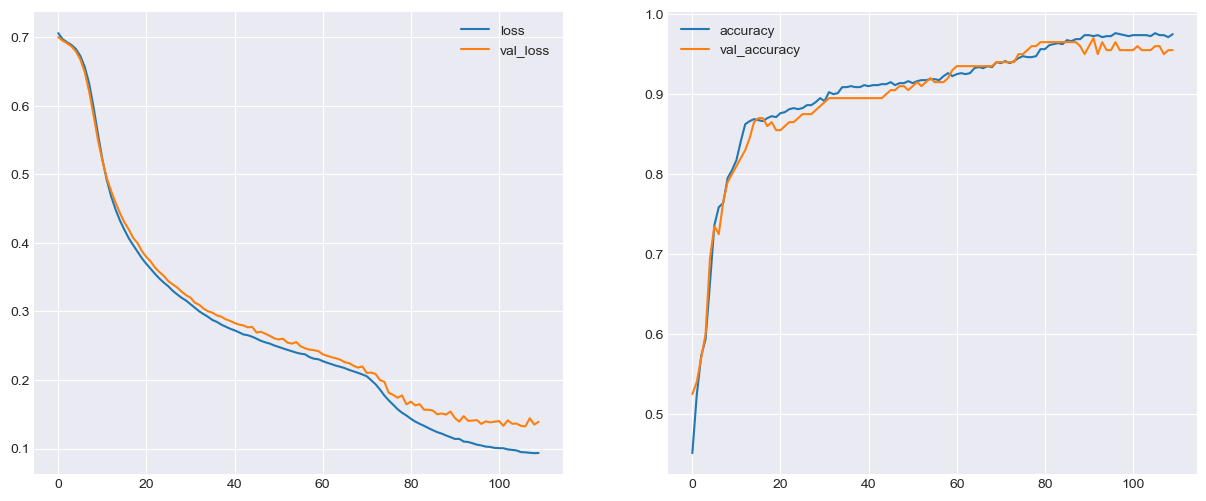

In [30]:
hist_df= pd.DataFrame(history.history)
fig, axes = plt.subplots(1,2)
ax = axes[0]
hist_df.plot(y = ['loss', 'val_loss'], ax = ax)
ax = axes[1]
hist_df.plot(y = ['accuracy', 'val_accuracy'], ax = ax)

In [31]:
# def fn_softmax(z):

#     exp_sc = np.exp(z - np.max(z))

#     return exp_sc/np.sum(exp_sc, axis=1, keepdims=True)

In [32]:
# fn_softmax(np.array([[-1., 0., 1.0], [-10, 0, 10]]))

#### TanH Activation

In [34]:
# def fn_actv(z):
#     return np.tanh(z)

# def fn_actv_prime(a):
#     return 1.0 - np.tanh(a)**2

In [35]:
# fn_actv(np.array([[-1., 0., 1.0], [-np.inf, 0, np.inf]]))

In [36]:
# 1- np.tanh(-1)**2

In [37]:
# def predict(model, X_p):

#     W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
#     W3, b3, W4, b4 = model['W3'], model['b3'], model['W4'], model['b4']
#     W5, b5,        = model['W5'], model['b5']
    



# ### forward propagation
#     #### Layer 1
#     z1 = X_p.dot(W1) + b1   # Aggregation 
#     a1 = fn_actv(z1)        # Activations

#     #### Layer 2
#     z2 = a1.dot(W2) + b2    # Aggregation 
#     a2 = fn_actv(z2)     # Activations

#     #### Layer 3
#     z3 = a2.dot(W3) + b3    # Aggregation 
#     a3 = fn_actv(z3)     # Activations

#     #### Layer 4
#     z4 = a3.dot(W4) + b4    # Aggregation 
#     a4 = fn_actv(z4)     # Activations

#     #### Layer 4
#     z5 = a4.dot(W5) + b5    # Aggregation 
#     a5 = fn_softmax(z5)     # Activations        # Activations

#     return np.argmax(a5, axis = 1) # will return True/False

In [38]:
# def calculate_loss(model, X_l, y_l):

#     W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
#     W3, b3, W4, b4 = model['W3'], model['b3'], model['W4'], model['b4']
#     W5, b5,        = model['W5'], model['b5']
    


#     m = X_l.shape[0]

# ### forward propagation
#     #### Layer 1
#     z1 = X_l.dot(W1) + b1   # Aggregation 
#     a1 = fn_actv(z1)        # Activations

#     #### Layer 2
#     z2 = a1.dot(W2) + b2    # Aggregation 
#     a2 = fn_actv(z2)     # Activations

#     #### Layer 3
#     z3 = a2.dot(W3) + b3    # Aggregation 
#     a3 = fn_actv(z3)     # Activations

#     #### Layer 4
#     z4 = a3.dot(W4) + b4    # Aggregation 
#     a4 = fn_actv(z4)     # Activations

#     #### Layer 4
#     z5 = a4.dot(W5) + b5    # Aggregation 
#     a5 = fn_softmax(z5)     # Activations

#     data_loss = -(y_l * np.log(a5)).sum()

#     return data_loss / m

In [39]:
# def build_model(param : dict, X_t : np.ndarray, y_t: np.ndarray, alpha : np.float64 = ALPHA, epochs : np.int64 = EPOCHS):
#     '''
#     Args:
#         param: dict : number of nodes in hidden layer
#         X_t: np.array : train features
#         y_t: np.array : train labels
#         alpha: float : learning rate
#         epochs: int : number of epochs to train
#     Return:
#         model : dict
#     '''
#     m= X_t.shape[0]

#     W1 = np.random.rand(param['nn_dim'][0],param['nn_dim'][1]) / np.sqrt(param['nn_dim'][0])
#     W2 = np.random.rand(param['nn_dim'][1],param['nn_dim'][2]) / np.sqrt(param['nn_dim'][1])
#     W3 = np.random.rand(param['nn_dim'][2],param['nn_dim'][3]) / np.sqrt(param['nn_dim'][2])
#     W4 = np.random.rand(param['nn_dim'][3],param['nn_dim'][4]) / np.sqrt(param['nn_dim'][3])
#     W5 = np.random.rand(param['nn_dim'][4],param['nn_dim'][5]) / np.sqrt(param['nn_dim'][4])



#     b1 = np.zeros((1, param['nn_dim'][1]))
#     b2 = np.zeros((1, param['nn_dim'][2]))
#     b3 = np.zeros((1, param['nn_dim'][3]))
#     b4 = np.zeros((1, param['nn_dim'][4]))
#     b5 = np.zeros((1, param['nn_dim'][5]))

#     # W1 = np.random.rand(nn_dim[0], nn_dim[1]) / np.sqrt(nn_dim[0])
#     # W2 = np.random.rand(nn_dim[1], nn_dim[2]) / np.sqrt(nn_dim[1])
#     # W3 = np.random.rand(nn_dim[2], nn_dim[3]) / np.sqrt(nn_dim[2])
#     # W4 = np.random.rand(nn_dim[3], nn_dim[4]) / np.sqrt(nn_dim[3])
#     # W5 = np.random.rand(nn_dim[4], nn_dim[5]) / np.sqrt(nn_dim[4])

#     # b1 = np.zeros((1, nn_dim[1]))
#     # b2 = np.zeros((1, nn_dim[2]))
#     # b3 = np.zeros((1, nn_dim[3]))
#     # b4 = np.zeros((1, nn_dim[4]))
#     # b5 = np.zeros((1, nn_dim[5]))




#     curr_loss = 0

#     loss = []
#     epoch = []

#     for i in range(epochs):


#         ### forward propagation
#         #### Layer 1
#         z1 = X_t.dot(W1) + b1   # Aggregation function
#         a1 = fn_actv(z1)        # Activations

#         #### Layer 2
#         z2 = a1.dot(W2) + b2    # Aggregation function
#         a2 = fn_actv(z2)     # Activations

#         #### Layer 3
#         z3 = a2.dot(W3) + b3    # Aggregation function
#         a3 = fn_actv(z3)     # Activations

#         #### Layer 4
#         z4 = a3.dot(W4) + b4    # Aggregation function
#         a4 = fn_actv(z4)     # Activations

#         #### Layer 4
#         z5 = a4.dot(W5) + b5    # Aggregation function
#         a5 = fn_softmax(z5)     # Activations

#         ### Back Propagation
#         ## Layer 5
#         assert (a5.shape == y_t.shape), f'Shape a5: {a5.shape} and y_t :{y_t.shape}'
#         dz5 = a5 - y_t
        
#         dW5 = (a4.T).dot(dz5)
#         assert (W5.shape == dW5.shape), f'Shape W2: {W5.shape} and dW2 :{dW5.shape}'

#         db5 = np.sum(dz5, axis =0, keepdims=True)
#         assert (b5.shape == db5.shape), f'Shape b5: {b5.shape} and db5 :{db5.shape}'

#         da4 = dz5.dot(W5.T)
#         assert (a4.shape == da4.shape), f'Shape a4: {a4.shape} and da4 :{da4.shape}'

#         # Layer 4

#         dz4 = da4 * fn_actv_prime(z4) # this element wise multiplication
#         assert (z4.shape == dz4.shape), f'Shape z4: {z4.shape} and dz4 :{dz4.shape}'

#         dW4 = (a3.T).dot(dz4)
#         assert (W4.shape == dW4.shape), f'Shape W4: {W4.shape} and dW4 :{dW4.shape}'

#         db4 = np.sum(dz4, axis =0, keepdims=True)
#         assert (b4.shape == db4.shape), f'Shape b4 : {b4.shape} and db4 :{db4.shape}'

#         da3 = dz4.dot(W4.T)
#         assert (a3.shape == da3.shape), f'Shape a3: {a3.shape} and da3 :{da3.shape}'

#         ##########
#         #################### Layer 3

#         dz3 = da3 * fn_actv_prime(z3)  
#         assert (z3.shape == dz3.shape), f'Shape z3: {z3.shape} and dz3: {dz3.shape}'
        
#         dW3 = (a2.T).dot(dz3)
#         assert (W3.shape == dW3.shape), f'Shape W3: {W3.shape} and dW3: {dW3.shape}'
        
#         db3 = np.sum(dz3, axis=0, keepdims=True)
#         assert (b3.shape == db3.shape), f'Shape b3: {b3.shape} and db3: {db3.shape}'
        
#         da2 = dz3.dot(W3.T)
#         assert (a2.shape == da2.shape), f'Shape a2: {a2.shape} and da2: {da2.shape}'

#         ################### Layer 2
#         dz2 = da2 * fn_actv_prime(z2)
#         assert (z2.shape == dz2.shape), f'Shape z2: {z2.shape} and dz2: {dz2.shape}'
        
#         dW2 = (a1.T).dot(dz2)
#         assert (W2.shape == dW2.shape), f'Shape W2: {W2.shape} and dW2: {dW2.shape}'
        
#         db2 = np.sum(dz2, axis=0, keepdims=True)
#         assert (b2.shape == db2.shape), f'Shape b2: {b2.shape} and db2: {db2.shape}'
        
#         da1 = dz2.dot(W2.T)
#         assert (a1.shape == da1.shape), f'Shape a1: {a1.shape} and da1: {da1.shape}'

#         ################## 1
#         dz1 = da1 * fn_actv_prime(z1) # this element wise multiplication
#         assert (z1.shape == dz1.shape), f'Shape z1: {z1.shape} and dz1 :{dz1.shape}'

#         dW1 = (X_t.T).dot(dz1)
#         assert (W1.shape == dW1.shape), f'Shape W1: {W1.shape} and dW1 :{dW1.shape}'

#         db1 = np.sum(dz1, axis =0, keepdims=True)
#         assert (b1.shape == db1.shape), f'Shape b1 : {b1.shape} and db1 :{db1.shape}'

#         W1 += -alpha * dW1 /m
#         W2 += -alpha * dW2 /m
#         W3 += -alpha * dW3 /m
#         W4 += -alpha * dW4 /m
#         W5 += -alpha * dW5 /m

#         b1 += -alpha * db1 /m
#         b2 += -alpha * db2 /m
#         b3 += -alpha * db3 /m
#         b4 += -alpha * db4 /m
#         b5 += -alpha * db5 /m


#         model = {'W1': W1,'b1': b1,
#                  'W2': W2,'b2': b2,
#                  'W3': W3,'b3': b3,
#                  'W4': W4,'b4': b4,
#                  'W5': W5,'b5': b5}

#         if i%100 == 0:
#             curr_loss = calculate_loss(model=model, X_l=X_t, y_l=y_t)
#             loss.append(curr_loss)
#             epoch.append(i)

#         if i%1000 == 0:
#             print (f'Loss after {i:5d} epoch : {curr_loss: 9.4f}')

#     loss_hist['loss'] = loss
#     loss_hist['epoch'] = epoch
#     return model

In [40]:
# layer_param = {}
# input_dim = X_train.shape[1]
# out_dim = y_train.shape[1]
# layer_param['nn_dim'] = [input_dim,50,50,40,30, out_dim]

In [41]:
# # keeping shape of a and y consistent
# y_train = y_train.reshape(-1,1)
# y_train.shape

In [42]:
# loss_hist = {}

In [43]:
# model = build_model(layer_param, X_train, y_train, ALPHA, EPOCHS)

In [44]:
# model['W1'].shape, model['W2'].shape, model['b1'].shape, model['b2'].shape

In [45]:
# pd.DataFrame(loss_hist).plot(x='epoch', y='loss');

### Training Data

In [47]:
y_pred = model.predict(X_train)

accuracy_score(y_pred=y_pred.argmax(axis =1), y_true=y_train)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step


0.97375

In [48]:
cm = confusion_matrix(y_pred=y_pred.argmax(axis =1), y_true=y_train)
cm

array([[391,   9],
       [ 12, 388]], dtype=int64)

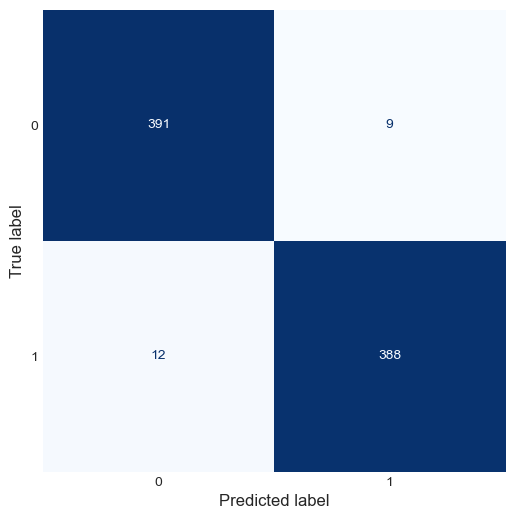

In [49]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

disp.plot(cmap='Blues', colorbar=False)
plt.grid()
plt.show()

### Testing Data

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Test Accuracy: 0.955


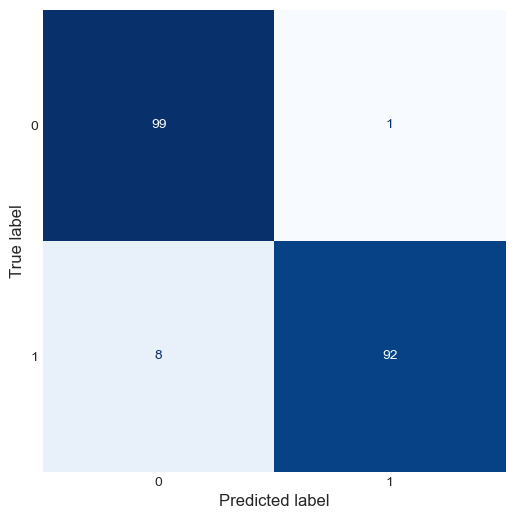

In [51]:
y_pred = model.predict(X_test)


# calculate accuracy
print (f'Test Accuracy: {accuracy_score(y_pred=y_pred.argmax(axis =1), y_true=y_test)}')

# calculate confusion matrix
cm = confusion_matrix(y_pred=y_pred.argmax(axis =1), y_true=y_test)

# plots always look good
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

disp.plot(cmap='Blues', colorbar=False)
plt.grid()
plt.show()

5529/5529 ━━━━━━━━━━━━━━━━━━━━ 3s 534us/step


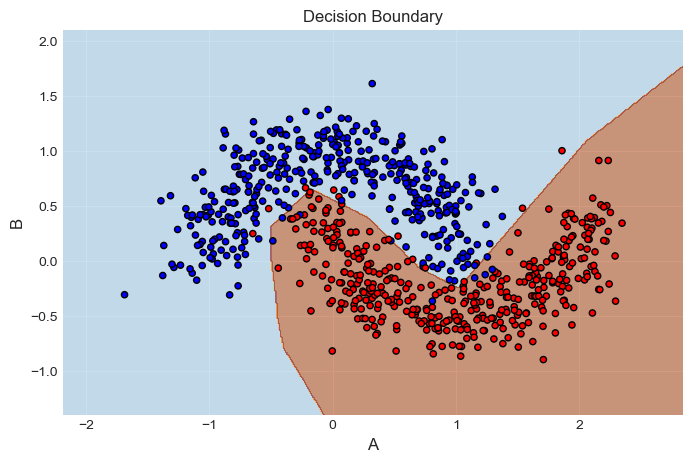

In [52]:
fn_plot_decision_boundary(model, X_train, y_train)